# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 23: Final Project II. Classification Problem: Predict Machine Maintenance 

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### 0. Setup

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng(1234)

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

### 1. The dataset

In this exercise you will be using `sklearn.tree.DecisionTreeClassifier` (the Decision Tree model for Classification) and `sklearn.linear_model.LogisticRegressionCV` to train a model to predict the type of failure of a specific type of industrial machinery.

The data set for this exercise is provided in your `_data` directory as `dss2023_finalProject_02.csv`.

The data set is based on the **Machine Predictive Maintenance Classification** data from Kaggle [source](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification). We did some data preparation for you so that you will be able to proceed to EDA and ML immediately.

#### 1.1 Load the dataset

Load the `dss2023_finalProject_02.csv`. Do not forget to use `index_col=[0]` w. `pd.read_csv()`.

In [2]:
data_set = pd.read_csv(os.path.join(data_dir, "dss2023_finalProject_02.csv"),
                       index_col=[0])
data_set

,type,airTemperature_K,processTemperature_K,rotationalSpeed_rpm,torque_nm,toolWear_min,target
1,M,298.1,308.6,1551,42.8,0,0
2,L,298.2,308.7,1408,46.3,3,0
3,L,298.1,308.5,1498,49.4,5,0
4,L,298.2,308.6,1433,39.5,7,0
5,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,0
9997,H,298.9,308.4,1632,31.8,17,0
9998,M,299.0,308.6,1645,33.4,22,0
9999,H,299.0,308.7,1408,48.5,25,0


The target variable is `target`, where `1` stands for `failure` and `0` for `no failure`. 

#### 1.2 Numerical Predictors

Produce and visualize a correlation matrix of all numerical predictors from `data_set`.

In [3]:
# Calculate correlation matrix
numerical_cols = ['airTemperature_K', 
                  'processTemperature_K', 
                  'rotationalSpeed_rpm', 
                  'torque_nm', 
                  'toolWear_min']
correlation_matrix = data_set[numerical_cols].corr()
print(correlation_matrix)

                      airTemperature_K  processTemperature_K  \
airTemperature_K              1.000000              0.876107   
processTemperature_K          0.876107              1.000000   
rotationalSpeed_rpm           0.022670              0.019277   
torque_nm                    -0.013778             -0.014061   
toolWear_min                  0.013853              0.013488   

                      rotationalSpeed_rpm  torque_nm  toolWear_min  
airTemperature_K                 0.022670  -0.013778      0.013853  
processTemperature_K             0.019277  -0.014061      0.013488  
rotationalSpeed_rpm              1.000000  -0.875027      0.000223  
torque_nm                       -0.875027   1.000000     -0.003093  
toolWear_min                     0.000223  -0.003093      1.000000  


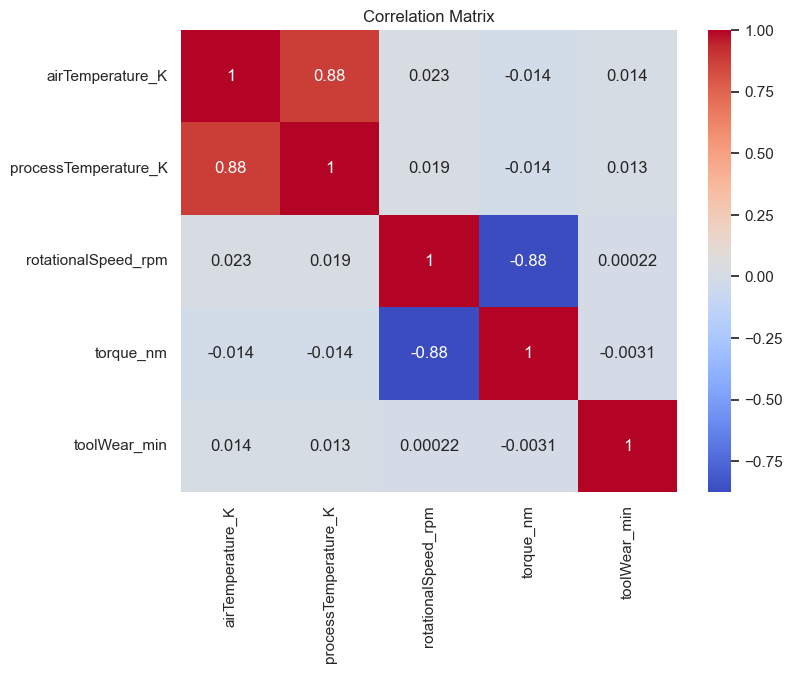

In [4]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

What can be conluded from this correlation matrix? Any possible problems for Linear Models in a future predictive task? Why? 

<< YOUR EXPLANATION HERE >>

#### 1.3 EDA

##### 1.3.1 Visualize numerical variables against the `target` outcome variable.

Visualize the distributions of the numerical predictors at each level of `target`. 

Produce as many plots as there are levels in `target`. Each plot should contain a set of boxplots, each panel a boxplot for the respective numerical predictor showing its distribution on the respective level of `target`.

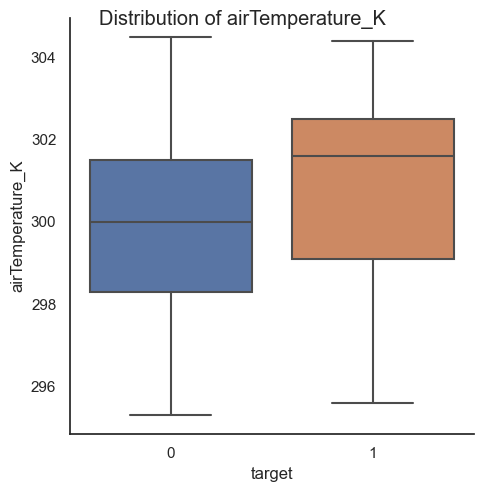

In [5]:
# airTemperature_K
g = sns.catplot(data=data_set, x="target", y="airTemperature_K", kind="box")

# Set the plot title
g.fig.suptitle('Distribution of airTemperature_K')

# Display the plot
plt.show()

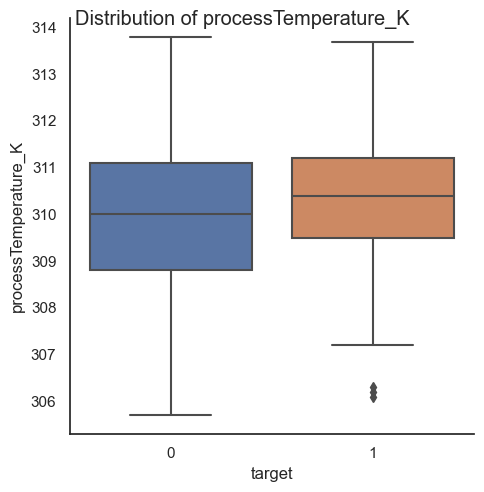

In [6]:
# processTemperature_K
g = sns.catplot(data=data_set, x="target", y="processTemperature_K", kind="box")

# Set the plot title
g.fig.suptitle('Distribution of processTemperature_K')

# Display the plot
plt.show()

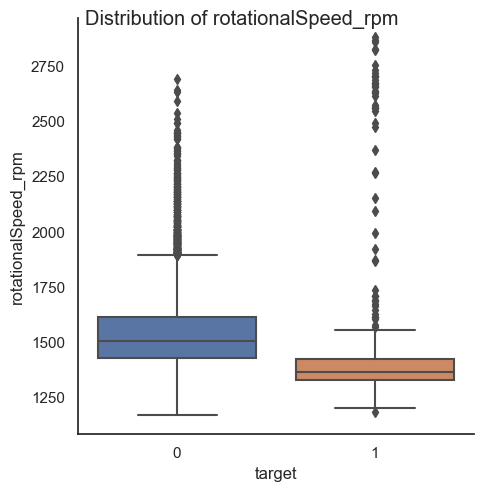

In [7]:
# rotationalSpeed_rpm
g = sns.catplot(data=data_set, x="target", y="rotationalSpeed_rpm", kind="box")

# Set the plot title
g.fig.suptitle('Distribution of rotationalSpeed_rpm')

# Display the plot
plt.show()

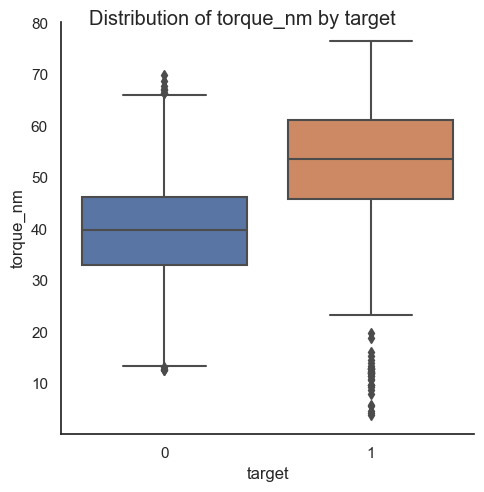

In [8]:
# torque_nm
g = sns.catplot(data=data_set, x="target", y="torque_nm", kind="box")

# Set the plot title
g.fig.suptitle('Distribution of torque_nm by target')

# Display the plot
plt.show()

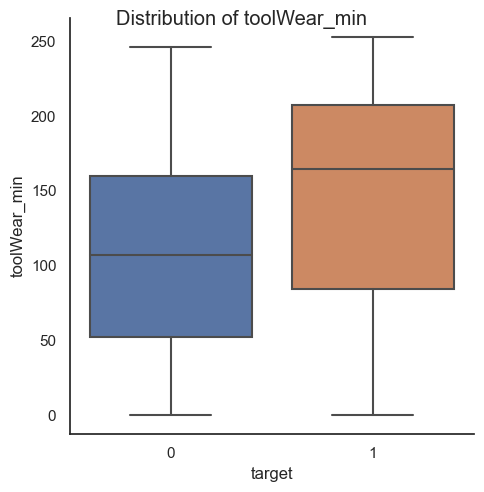

In [9]:
# toolWear_min
g = sns.catplot(data=data_set, x="target", y="toolWear_min", kind="box")

# Set the plot title
g.fig.suptitle('Distribution of toolWear_min')

# Display the plot
plt.show()

Please comment on the outliers.

<< YOUR COMMENT HERE >>

#### 1.4 Class Imbalance

Please provide overview of the frequencies of values in the outcome variable. Comment if the distribution could cause some problems in predictive modeling.

In [10]:
frequency_table = data_set['target'].value_counts()
print(frequency_table)

0    9661
1     339
Name: target, dtype: int64


<< YOUR COMMENT HERE >>

#### 1.4 Split into 20% validation and 80% training data

Notice the following from the Setup section: 

`from sklearn.model_selection import train_test_split`

Now, it is extremely easy to make a 80/20 data split with `sklearn`: Google and figure out how to do it. You need to produce two new DataFrames, `train_set` (80% of data) and `validation_set` (20 % of data). Do it:

In [11]:
train_set, validation_set = train_test_split(data_set, test_size=0.2, random_state=42)
print("Training set shape:", train_set.shape)
print("Validation set shape:", validation_set.shape)

Training set shape: (8000, 7)
Validation set shape: (2000, 7)


#### 1.5 Perform a 5-Fold CV for Hyperparameter Tuning for Decision Tree Classifier

In this task, you will be performing hyperparameter tuning for a Decision Tree Classifier using `scikit-learn`. The goal is to find the best combination of hyperparameters that maximize the `weighted F1` score for `training_set`.

The hyperparameters to be tuned are: 

- max_depth, use [5, 10]
- min_samples_leaf, use [100, 250], and
- max_features, use [4, 5, 6]

in order to remind yourself of all these hyperparameters study the [sklearn.tree.DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

To solve this task, you can follow these steps:

1. Define the categorical and numerical feature columns:

```
categorical_cols = ['type']
numerical_cols = ['airTemperature_K', 
                  'processTemperature_K', 
                  'rotationalSpeed_rpm', 
                  'torque_nm', 
                  'toolWear_min']
```

2. Create a pipeline using the Pipeline class, where you utilize the ColumnTransformer to handle categorical and numerical features separately; use OneHotEncoder for categorical features and StandardScaler for numerical features:

```
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(criterion='gini'))
])
```

3. Define a custom scoring function using make_scorer to calculate the weighted F1 score:

```
scoring = make_scorer(f1_score, average='weighted')
```

4. Specify the hyperparameters and their corresponding ranges in a param_grid dictionary.

5. Perform cross-validation using GridSearchCV with 5-fold **stratified sampling**. 

6. Pass the pipeline, param_grid, custom scoring function, and other necessary parameters and fit the grid search object to the training data.


7. Print the best hyperparameters and the corresponding weighted F1 score.

In [12]:
# Extracting the features and target variable from the training set
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']

# Defining the categorical and numerical feature columns
categorical_cols = ['type']
numerical_cols = ['airTemperature_K', 
                  'processTemperature_K', 
                  'rotationalSpeed_rpm', 
                  'torque_nm', 
                  'toolWear_min']

# Creating a pipeline with ColumnTransformer and DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(criterion='gini'))
])

# Define custom scoring function (weighted F1 score)
scoring = make_scorer(f1_score, average='weighted')

# Define the hyperparameters and their corresponding ranges
param_grid = {
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_leaf': [100, 250],
    'classifier__max_features': [4, 5, 6]}

# Perform cross-validation using GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=cv, 
                           scoring=scoring,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Weighted F1 Score:", best_score)

Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__max_features': 6, 'classifier__min_samples_leaf': 100}
Best Weighted F1 Score: 0.9522246059459551


#### 1.6 Now Refit the best model on the whole  `training_set` w/o cross-validation!

Define your `DecisionTreeClassifier()` from the best obtained hyperparameters from CV and re-train it on the whole training set w/o cross-validation. Enter the best obtained hyperparameter values into the `Pipeline()`! Print the model's weighted F1 score.

In [13]:
# Creating a pipeline with ColumnTransformer and DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=best_params['classifier__max_depth'],
                                          min_samples_leaf=best_params['classifier__min_samples_leaf'],
                                          max_features=best_params['classifier__max_features']))
])

# Fit the classifier to the whole training set
pipeline.fit(X_train, y_train)

# Get the predictions for the training set
y_train_pred = pipeline.predict(X_train)

# Calculate the weighted F1 score
f1_weighted = f1_score(y_train, y_train_pred, average='weighted')

# Print the weighted F1 score
print("Weighted F1 Score:", f1_weighted)

Weighted F1 Score: 0.9683199546986492


Now, tell us how does your model perform on the `validation_set`?

In [14]:
# Extract the features and target variable from the validation set
X_val = validation_set.drop('target', axis=1)
y_val = validation_set['target']

# Get the predictions for the validation set
y_val_pred = pipeline.predict(X_val)

# Calculate the weighted F1 score
f1_weighted = f1_score(y_val, y_val_pred, average='weighted')

# Print the weighted F1 score on the validation set
print("Weighted F1 Score (Validation Set):", f1_weighted)

Weighted F1 Score (Validation Set): 0.9692473099186761


See, there is a way to make `DecisionTreeClassifier()` predict the probabilities for each class.

The `predict_proba()` method is a function provided by scikit-learn's `DecisionTreeClassifier` class, which is used to estimate the probability of each class label for a given input sample or set of samples.

Here's an explanation of the `predict_proba()` method:

Parameters:

- `X`: The input samples for which you want to estimate the class probabilities. It should be a 2D array-like or pandas DataFrame.

Returns:

- `proba`: The class probabilities for each input sample. It is an array of shape (`n_samples`, `n_classes`), where `n_samples` is the number of input samples and `n_classes` is the number of classes.

The `predict_proba()` method calculates the probability estimates based on the learned decision tree model. For each input sample, it traverses the decision tree and computes the fraction of training samples that belong to each class within the corresponding leaf node. These fractions represent the probability estimates for each class.

Let's try it out on our `validation_set`:

In [15]:
# Get the predictions for the validation set with predict_proba()
y_val_pred = pipeline.predict_proba(X_val)
y_val_pred

array([[0.997782  , 0.002218  ],
       [0.997782  , 0.002218  ],
       [0.997782  , 0.002218  ],
       ...,
       [1.        , 0.        ],
       [0.73      , 0.27      ],
       [0.99526066, 0.00473934]])

The first column in `y_val_pred` represents the probability that `target==0`!

Now, we have the class labels in `y` and we can say from the probability in the second column of `y_val_pred` if the predicted label is `1` or `0` by looking if that probability is higher than `.5`, of course.

But... we want to perform and ROC analysis now. 

Do the following:

- set the `decision_treshold` to be a set of numbers from `.001` to `.999` spaced by `.001`
- iterate over decision tresholds and each time
- use `predict_proba()`, check the probability in the second column, predict `1` if is larger than the current `decision_treshold`, and store the result, 
- compute the True Positive Rate (TPR) and the False Positive Rate (FPR),
- so to obtain a Pandas DataFrame with the following columns: `DecTreshold`, `TPR`, `FPR`.

Plot the `observed` vs. `predicted` values from the best obtained model

In [16]:
# Set the decision thresholds from .01 to .99 spaced by .01
decision_thresholds = np.arange(.001, .999, .001)

# Initialize empty lists to store the TPR and FPR
tpr_list = []
fpr_list = []

# Count the positive cases in y_val
positive_cases = np.sum(y_val == 1)

# Iterate over the decision thresholds
for threshold in decision_thresholds:
    # Obtain the predicted class probabilities for the validation set
    proba_val = pipeline.predict_proba(X_val)
    
    # Get the predicted labels based on the decision threshold
    y_pred = (proba_val[:, 1] >= threshold).astype(int)
    
    # Calculate True Positive (TP) and False Positive (FP)
    TP = np.sum((y_val == 1) & (y_pred == 1))
    FP = np.sum((y_val == 0) & (y_pred == 1))
    
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    TPR = TP / positive_cases
    FPR = FP / (len(y_val) - positive_cases)
    
    # Append TPR and FPR to the respective lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Create a DataFrame with the results
roc_df = pd.DataFrame({
    'DecTreshold': decision_thresholds,
    'TPR': tpr_list,
    'FPR': fpr_list
})
roc_df

,DecTreshold,TPR,FPR
0,0.001,1.000000,0.984012
1,0.002,1.000000,0.984012
2,0.003,0.918033,0.174832
3,0.004,0.918033,0.174832
4,0.005,0.901639,0.142341
...,...,...,...
993,0.994,0.000000,0.000000
994,0.995,0.000000,0.000000
995,0.996,0.000000,0.000000
996,0.997,0.000000,0.000000


Now plot the ROC curve for this `DecisionTreeClassifier`!

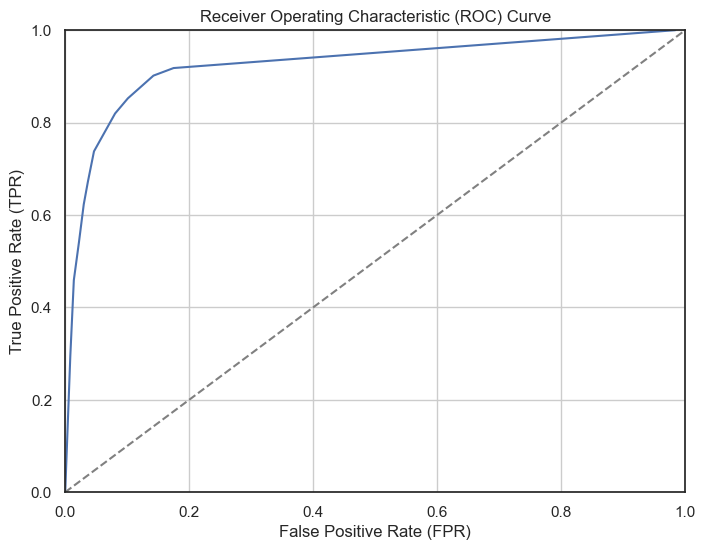

In [17]:
# Plot the ROC curve
plt.plot(roc_df['FPR'], roc_df['TPR'])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.grid(True)
plt.show()

### 2. How does the Binomial Logistic Regression compare?

#### 2.1 5-fold CV of the L2-Regularized Binomial Logistic Regression Model

- Extract the feature matrix `X` and the outcome `y` from `train_set`
- Define categorical and numerical features again as `categorical_cols` and `numerical_cols`
- Define `enc` as an instance of `OneHotEncoder` and apply it to ``X_train[categorical_cols]` to obtain `X_train_encoded` from `X`
- Define `scl` as an instance of `StandardScale` and apply it to ``X_train[numerical_cols]` to obtain `X_train_scaled` from `X`
- Do this: 

```
X_train_processed = np.hstack((X_train_encoded.toarray(), 
                               X_train_scaled))
```

to obtain `X_train_processed`; you will use `X_train_processed` as your feature matrix;

- Define the scorer: `scorer = make_scorer(f1_score, average='weighted')`
- Use `LogisticRegressionCV()` with the following parameters:
   - solver='liblinear'
   - cv=5
   - penalty='l2'
   - Cs=100
   - class_weight='balanced'
   - scoring=scorer
   - max_iter=1e6
   - n_jobs=-1

to perform a 5-fold CV of the Binomial Logistic Regression model;
- print out the best model's hyperparameters.

In [18]:
# Extract the features and target variable from the training set
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']

# Define the categorical and numerical feature columns
categorical_cols = ['type']
numerical_cols = ['airTemperature_K', 
                  'processTemperature_K', 
                  'rotationalSpeed_rpm', 
                  'torque_nm', 
                  'toolWear_min']

# Encode categorical features and scale numerical features
enc = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = enc.fit_transform(X_train[categorical_cols])
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train[numerical_cols])

# Combine the encoded categorical features and scaled numerical features
X_train_processed = np.hstack((X_train_encoded.toarray(), 
                               X_train_scaled))

# Define the weighted F1 scorer
scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation using regularized LogisticRegressionCV with ElasticNet
logreg_cv = LogisticRegressionCV(solver='liblinear', 
                                 cv=5, 
                                 penalty='l2', 
                                 Cs=100, 
                                 class_weight='balanced', 
                                 scoring=scorer, 
                                 max_iter=1e6,
                                 n_jobs=-1)
# Fit
logreg_cv.fit(X_train_processed, y_train)

# Print the parameters of the selected model
print("Selected Parameters:")
print("C:", logreg_cv.C_[0])

Selected Parameters:
C: 79.24828983539186


Now re-train across the whole `train_set` w/o CV; provide the weighted F1 score for this model.

In [19]:
# Instantiate LogisticRegression with the best parameters from CV
logreg = LogisticRegression(solver='liblinear', 
                            penalty='l2', 
                            C=logreg_cv.C_[0], 
                            class_weight='balanced', 
                            max_iter=int(1e6))

# Fit the model on the entire training set
logreg.fit(X_train_processed, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train_processed)

# Compute the weighted F1 score
weighted_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print the weighted F1 score
print("Weighted F1 Score on Train Set:", weighted_f1)

Weighted F1 Score on Train Set: 0.8744702947206378


And now for the `validation_set`:

In [20]:
# Extract the features and target variable from the training set
X_val = validation_set.drop('target', axis=1)
y_val = validation_set['target']

# Define the categorical and numerical feature columns
categorical_cols = ['type']
numerical_cols = ['airTemperature_K', 
                  'processTemperature_K', 
                  'rotationalSpeed_rpm', 
                  'torque_nm', 
                  'toolWear_min']

# Encode categorical features and scale numerical features
enc = OneHotEncoder(handle_unknown='ignore')
X_val_encoded = enc.fit_transform(X_val[categorical_cols])
scl = StandardScaler()
X_val_scaled = scl.fit_transform(X_val[numerical_cols])

# Combine the encoded categorical features and scaled numerical features
X_val_processed = np.hstack((X_val_encoded.toarray(),
                             X_val_scaled))

# Make predictions on the training set
y_val_pred = logreg.predict(X_val_processed)

# Compute the weighted F1 score
weighted_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the weighted F1 score
print("Weighted F1 Score on Validation Set:", weighted_f1)

Weighted F1 Score on Validation Set: 0.87382164080161


#### 2.2 Compare the ROC curves of the Decision Tree and the L2-Regularized Binomial Logistic Regression Model

You have all the elements:

- vary the decision treshold for the Binary Logistic Regression to produce a DataFrame with the following columns: `DecTreshold`, `TPR`, `FPR`;
- combine that DataFrame with the similar DataFrame obtained from the ROC analysis of the Decision Tree Model;
- plot the ROC curves of the two models on the same chart: which model performed better?

In [21]:
# Set the decision thresholds from .01 to .99 spaced by .01
decision_thresholds = np.arange(.001, .999, .001)

# Initialize empty lists to store the TPR and FPR
tpr_list = []
fpr_list = []

# Count the positive cases in y_val
positive_cases = np.sum(y_val == 1)

# Iterate over the decision thresholds
for threshold in decision_thresholds:
    # Obtain the predicted class probabilities for the validation set
    proba_val = logreg.predict_proba(X_val_processed)
    
    # Get the predicted labels based on the decision threshold
    y_pred = (proba_val[:, 1] >= threshold).astype(int)
    
    # Calculate True Positive (TP) and False Positive (FP)
    TP = np.sum((y_val == 1) & (y_pred == 1))
    FP = np.sum((y_val == 0) & (y_pred == 1))
    
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    TPR = TP / positive_cases
    FPR = FP / (len(y_val) - positive_cases)
    
    # Append TPR and FPR to the respective lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Create a DataFrame with the results
roc_df_blr = pd.DataFrame({
    'DecTreshold': decision_thresholds,
    'TPR': tpr_list,
    'FPR': fpr_list
})
roc_df_blr

,DecTreshold,TPR,FPR
0,0.001,1.000000,1.000000
1,0.002,1.000000,1.000000
2,0.003,1.000000,0.998969
3,0.004,1.000000,0.994843
4,0.005,1.000000,0.988654
...,...,...,...
993,0.994,0.032787,0.000000
994,0.995,0.032787,0.000000
995,0.996,0.000000,0.000000
996,0.997,0.000000,0.000000


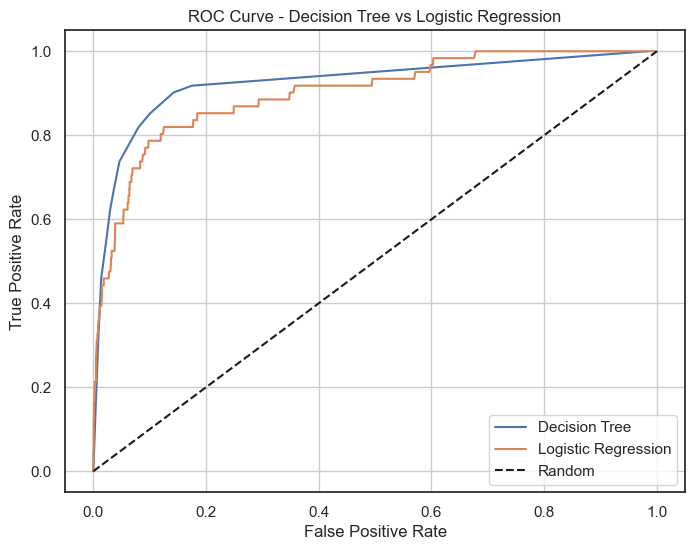

In [22]:
# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(roc_df['FPR'], roc_df['TPR'], label='Decision Tree')
plt.plot(roc_df_blr['FPR'], roc_df_blr['TPR'], label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree vs Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>